In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


### **Column Name - Description**  
| Column Name | Description |
|------------|-------------|
| **CRIM**   | Per capita crime rate in the town |
| **ZN**     | Proportion of residential land zoned for lots over 25,000 sq. ft. |
| **INDUS**  | Proportion of non-retail business acres per town |
| **CHAS**   | Charles River dummy variable (1 if the tract bounds the river, 0 otherwise) |
| **NOX**    | Nitrogen oxide concentration (parts per 10 million) |
| **RM**     | Average number of rooms per dwelling |
| **AGE**    | Proportion of owner-occupied units built before 1940 |
| **DIS**    | Weighted distance to five Boston employment centers |
| **RAD**    | Index of accessibility to radial highways |
| **TAX**    | Property tax rate per $10,000 |
| **PTRATIO**| Pupil-teacher ratio by town |
| **B**      | \( B = 1000(B_k - 0.63)^2 \), where \( B_k \) is the proportion of Black residents   in town |
| **LSTAT**  | Percentage of lower-status population |
| **MEDV**   | Median value of owner-occupied homes (in $1000s) |

In [3]:
# We drop column B in our dataset because of racism
df.drop("B", axis=1, inplace= True)

In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    486 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 51.5 KB


In [6]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
LSTAT      20
MEDV        0
dtype: int64

In [7]:
df.dropna(inplace= True)

### **EDA**

<Axes: >

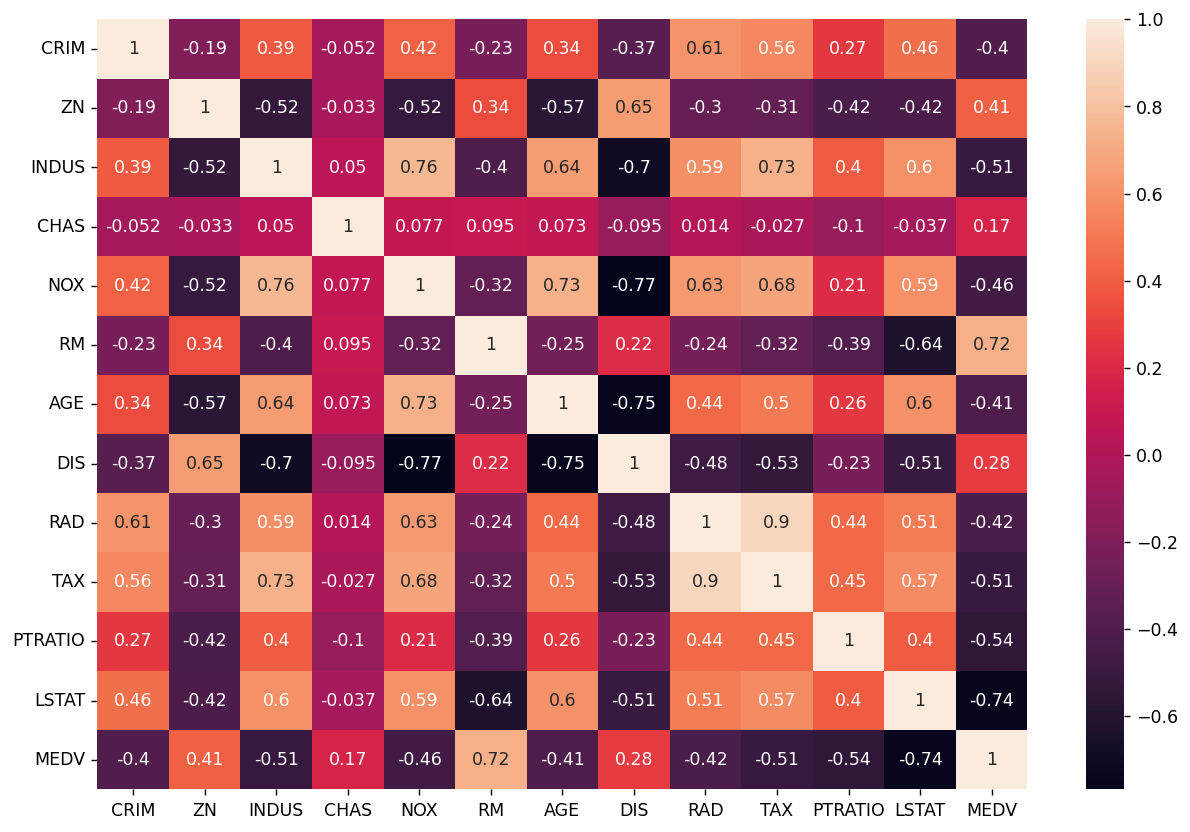

In [8]:
plt.figure(figsize=(12, 8),dpi= 125)
sns.heatmap(df.corr(numeric_only= True), annot= True)

<Axes: xlabel='RM', ylabel='DIS'>

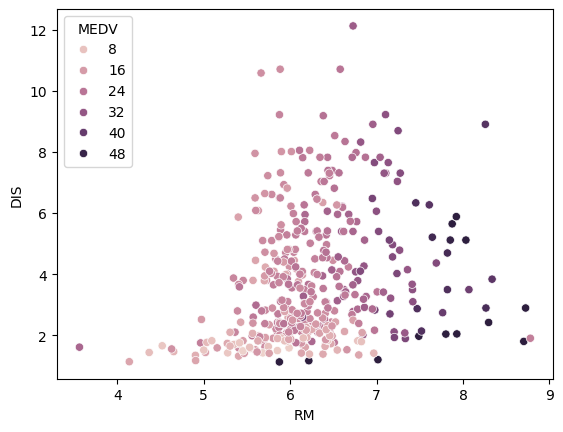

In [9]:
sns.scatterplot(x= "RM", y= "DIS", hue= "MEDV", data=df)

### **X and y**

In [11]:
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

### **Train Test Split**

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

### **Linear Regression**

In [19]:
from sklearn.linear_model import LinearRegression

In [22]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [23]:
lin_pred = lin_model.predict(X_test)

##### **Metrics**

In [25]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [27]:
mae = round(mean_absolute_error(y_test, lin_pred),2)
rmse = round(np.sqrt(mean_squared_error(y_test, lin_pred)),2)
r2 = round(r2_score(y_test, lin_pred),2)

print(f"MAE: {mae} RMSE : {rmse}  R2 Score : {r2}")

MAE: 3.17 RMSE : 5.04  R2 Score : 0.69


### **Poly Regression**

In [28]:
from sklearn.preprocessing import PolynomialFeatures

In [47]:
poly_conv = PolynomialFeatures(degree=2, include_bias= False)

poly_X_train = poly_conv.fit_transform(X_train)
poly_X_test = poly_conv.transform(X_test)

In [48]:
poly_model = LinearRegression(fit_intercept= True)
poly_model.fit(poly_X_train, y_train)

LinearRegression()

In [49]:
poly_pred = poly_model.predict(poly_X_test)

In [50]:
mae = round(mean_absolute_error(y_test, poly_pred),2)
rmse = round(np.sqrt(mean_squared_error(y_test, poly_pred)),2)
r2 = round(r2_score(y_test, poly_pred),2)

print(f"MAE: {mae} RMSE : {rmse}  R2 Score : {r2}")

MAE: 2.9 RMSE : 4.65  R2 Score : 0.74


### **Random Forest Regression**

In [67]:
from sklearn.ensemble import RandomForestRegressor

In [72]:
rand_forest = RandomForestRegressor()
rand_forest.fit(X_train, y_train)

RandomForestRegressor()

In [73]:
rand_pred = rand_forest.predict(X_test)

In [80]:
mae = round(mean_absolute_error(y_test, rand_pred),2)
rmse = round(np.sqrt(mean_squared_error(y_test, rand_pred)),2)
r2 = round(r2_score(y_test, rand_pred),2)

print(f"MAE: {mae} RMSE : {rmse}  R2 Score : {r2}")

MAE: 2.12 RMSE : 3.17  R2 Score : 0.88
